In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D
from keras.layers import Activation, Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 4s 0us/step


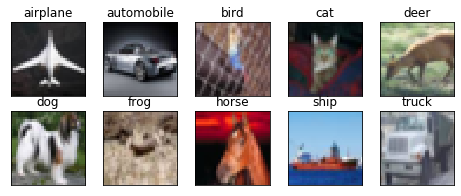

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [11]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_10 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 96)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 8s 20ms/step - loss: 1.8700 - acc: 0.2735 - val_loss: 1.4578 - val_acc: 0.4514
Epoch 2/50
390/390 [==============================] - 7s 17ms/step - loss: 1.3853 - acc: 0.4959 - val_loss: 1.1795 - val_acc: 0.5719
Epoch 3/50
390/390 [==============================] - 7s 17ms/step - loss: 1.1594 - acc: 0.5883 - val_loss: 0.9899 - val_acc: 0.6552
Epoch 4/50
390/390 [==============================] - 7s 17ms/step - loss: 1.0050 - acc: 0.6497 - val_loss: 0.9329 - val_acc: 0.6800
Epoch 5/50
390/390 [==============================] - 7s 18ms/step - loss: 0.8984 - acc: 0.6875 - val_loss: 0.7819 - val_acc: 0.7336
Epoch 6/50
390/390 [==============================] - 7s 18ms/step - loss: 0.8242 - acc: 0.7208 - val_loss: 0.7605 - val_acc: 0.7403
Epoch 7/50
390/390 [==============================] - 7s 18ms/step - loss: 0.7680 - acc: 0.7383 - val_loss: 0.7051 - val_acc: 0.7641
Epoch 8/50
390/390 [==============================] - 7s 18ms/step - 

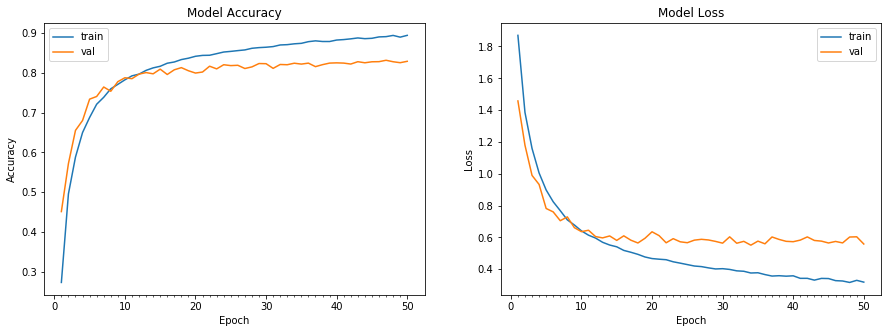

Accuracy on test data is: 82.86


In [13]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [47]:
model = Sequential()
model.add(SeparableConv2D(48, 3, padding="same", input_shape=(32, 32, 3))) # output: 32x32x48, RF: 3x3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(SeparableConv2D(48, 3))                                          # output: 30x30x48, RF: 5x5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(SeparableConv2D(96, 3, padding="same"))                          # output: 30x30x96, RF: 7x7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(SeparableConv2D(96, 3))                                          # output: 28x28x96, RF: 9x9
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(SeparableConv2D(96, 3, padding="same"))                          # output: 28x28x96, RF: 11x11
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(SeparableConv2D(192, 3))                                         # output: 26x26x192, RF: 13x13
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))                                  # output: 13x13x192, RF: 14x14
model.add(Dropout(0.25))

model.add(SeparableConv2D(96, 3, padding="same"))                          # output: 13x13x96, RF: 18x18
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(SeparableConv2D(96, 3))                                          # output: 11x11x96, RF: 22x22
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))                                  # output: 5x5x96, RF: 24x24
model.add(Dropout(0.25))

model.add(SeparableConv2D(num_classes, 3))                                 # output: 3x3x10, RF: 32x32
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.1))
model.add(GlobalAveragePooling2D())                                        # output: 10, RF: 40x40

model.add(Activation('softmax'))                                           # output: 10, RF: 40x40

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_199 (Separa (None, 32, 32, 48)        219       
_________________________________________________________________
batch_normalization_23 (Batc (None, 32, 32, 48)        192       
_________________________________________________________________
activation_223 (Activation)  (None, 32, 32, 48)        0         
_________________________________________________________________
separable_conv2d_200 (Separa (None, 30, 30, 48)        2784      
_________________________________________________________________
batch_normalization_24 (Batc (None, 30, 30, 48)        192       
_________________________________________________________________
activation_224 (Activation)  (None, 30, 30, 48)        0         
_________________________________________________________________
dropout_116 (Dropout)        (None, 30, 30, 48)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  """


Epoch 1/50
390/390 [==============================] - 40s 102ms/step - loss: 1.7056 - acc: 0.4199 - val_loss: 1.4925 - val_acc: 0.4953
Epoch 2/50
390/390 [==============================] - 34s 88ms/step - loss: 1.2667 - acc: 0.5920 - val_loss: 1.7913 - val_acc: 0.3957
Epoch 3/50
390/390 [==============================] - 34s 88ms/step - loss: 1.0809 - acc: 0.6510 - val_loss: 1.0718 - val_acc: 0.6413
Epoch 4/50
390/390 [==============================] - 34s 88ms/step - loss: 0.9573 - acc: 0.6926 - val_loss: 1.2440 - val_acc: 0.5643
Epoch 5/50
390/390 [==============================] - 34s 88ms/step - loss: 0.8686 - acc: 0.7187 - val_loss: 0.9020 - val_acc: 0.6978
Epoch 6/50
390/390 [==============================] - 34s 88ms/step - loss: 0.8066 - acc: 0.7383 - val_loss: 0.8131 - val_acc: 0.7204
Epoch 7/50
390/390 [==============================] - 34s 87ms/step - loss: 0.7502 - acc: 0.7565 - val_loss: 0.7846 - val_acc: 0.7425
Epoch 8/50
390/390 [==============================] - 34s 88m

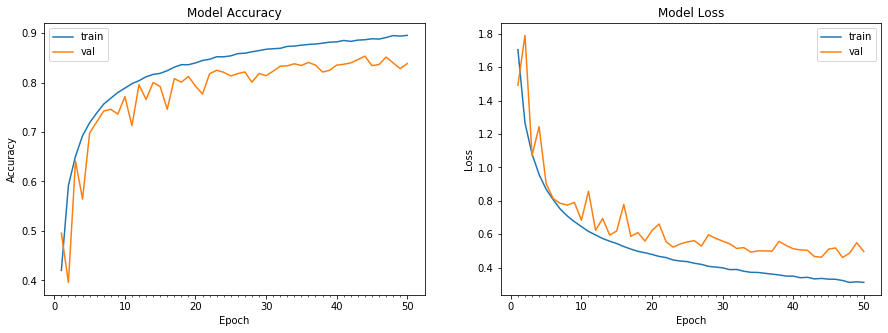

Accuracy on test data is: 83.84


In [48]:
# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))